### loss 是向量内积，是一个标量

In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt

In [24]:
from sklearn.utils import shuffle

In [108]:
np.random.seed(5)
x_data = np.linspace(0, 60, 200)
x_data.shape

(200,)

In [72]:
y_data = 3.1415 * x_data + 3.15 + np.random.randn(*x_data.shape) * 15

In [73]:
dataframe = pd.DataFrame({'x_data':x_data,'y_data':y_data})
dataframe.to_csv("test2024.csv", index=False,sep=',')

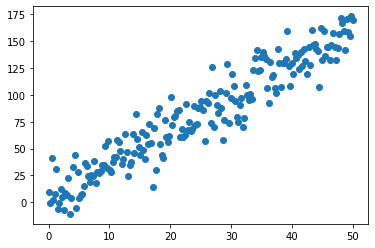

In [74]:
plt.scatter(x_data, y_data)

In [75]:
data = pd.read_csv('test2024.csv')
data.head()

,x_data,y_data
0,0.000000,9.768412
1,0.251256,-1.023731
2,0.502513,41.190211
3,0.753769,1.736583
4,1.005025,7.951434


In [76]:
x_data = np.array(data['x_data'])
y_data = np.array(data['y_data'])

In [82]:
X, y = shuffle(x_data, y_data, random_state=13)
X = X.astype(np.float32)

In [83]:
offset = int(X.shape[0]*0.9)

x_train = X[:offset]
y_train = y[:offset]

x_test = X[offset:]
y_test = y[offset:]

x_train = x_train.reshape((-1,1))
x_test = x_test.reshape((-1,1))

y_train = y_train.reshape((-1,1))
y_test = y_test.reshape((-1,1))

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(180, 1)
(20, 1)
(180, 1)
(20, 1)


In [115]:
class Linear_modle():
    def __init__(self):
        self.w = None
        self.b = None
        self.dw = None
        self.db = None
        self.loss = 0
        self.y_hat = None
        
    def linear_loss(self, X, y):
        num_train = X.shape[0]
        num_feature = X.shape[1]
        
        self.y_hat = np.dot(X,self.w) + self.b
        # 损失
        self.loss = np.sum((y-self.y_hat)**2) / num_train
        # 梯度
        self.dw = np.dot(X.T, (self.y_hat - y)) / num_train
        # 梯度
        self.db = np.sum((self.y_hat - y)) / num_train
        
        # return y_hat, loss, dw, db
    
    def init_params(self, dims):
        self.w = np.zeros((dims, 1))
        self.b = 0
        
        
    # learning_rate 选取至关重要，刚开始选的不对，迭代的时候显示溢出
    def linear_train(self, X, y, learning_rate=0.001, niters = 10000):
        # 直接用init_params显示未定义， 总忘要加self
        self.init_params(X.shape[1])
        
        loss_list = []
        for i in range(1, niters):
            self.linear_loss(X, y)
            loss_list.append(self.loss)
            
            self.w += -learning_rate * self.dw
            self.b += -learning_rate * self.db
            
            if i%1000 == 0:
                print("epoch %d loss %f" % (i, self.loss))
                
            params = {
                'w':self.w,
                'b':self.b,
            }
            
            grads = {
                'dw':self.dw,
                'db':self.db
            }
            
        return params, grads, loss_list
    
    def predict(self, x):
        pass
    

In [116]:
linear_model = Linear_modle()


In [117]:
params, grads, loss_list = linear_model.linear_train(x_train, y_train)

epoch 1000 loss 223.070144
epoch 2000 loss 222.129066
epoch 3000 loss 221.566768
epoch 4000 loss 221.230792
epoch 5000 loss 221.030045
epoch 6000 loss 220.910098
epoch 7000 loss 220.838429
epoch 8000 loss 220.795606
epoch 9000 loss 220.770019


In [111]:
print(params)

{'w': array([[3.16067163]]), 'b': 3.6987625200869747}


In [112]:
w = float(params['w'])
b = float(params['b'])

x_points = np.linspace(0,50,20)
print("coef : %f, interception : %f" % (w, b))
y_points = x_points*w + b

coef : 3.160672, interception : 3.698763


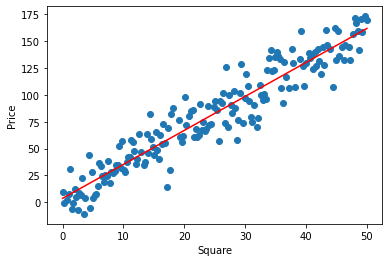

In [113]:
plt.scatter(x_train, y_train)
plt.plot(x_points, y_points, '-r', label= 'y=w*x=b')
plt.xlabel('Square')
plt.ylabel('Price')
plt.show()

In [123]:
predict = x_test.dot(params['w']) + params['b']
f = predict

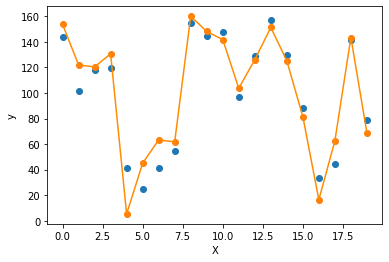

In [125]:
# 对预测结果和真值进行展示：
plt.scatter(range(x_test.shape[0]),y_test)
plt.scatter(range(x_test.shape[0]),f)
plt.plot(f,color = 'darkorange')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

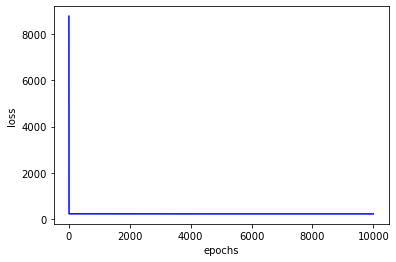

In [118]:
plt.plot(loss_list, color='b')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()